In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score
import seaborn as sns

In [2]:
df = pd.read_csv("./input/bugzilla.csv")

In [3]:
df.head()

transactionid        commitdate  ns  nm  nf   entropy        la        ld  \
0              3  2001/12/12 17:41   1   1   3  0.579380  0.093620  0.000000   
1              7  1999/10/12 12:57   1   1   1  0.000000  0.000000  0.000000   
2              8   2002/5/15 16:55   3   3  52  0.739279  0.183477  0.208913   
3              9   2002/1/21 15:37   1   1   8  0.685328  0.016039  0.012880   
4             10  2001/12/19 16:44   2   2  38  0.769776  0.091829  0.072746   

           lt  fix  ndev     pd       npt  exp    rexp  sexp  bug  
0  480.666667    1    14    596  0.666667  143  133.50   129    1  
1  398.000000    1     1      0  1.000000  140  140.00   137    1  
2  283.519231    0    23  15836  0.750000  984  818.65   978    0  
3  514.375000    1    21   1281  1.000000  579  479.25   550    0  
4  366.815789    1    21   6565  0.763158  413  313.25   405    0

/Users/hatorikoudai/.pyenv/versions/anaconda3-2.5.0/lib/python3.5/site-packages/numexpr/cpuinfo.py:76: UserWarning: [Errno 2] No such file or directory: 'sysctl'
  stacklevel=stacklevel + 1):


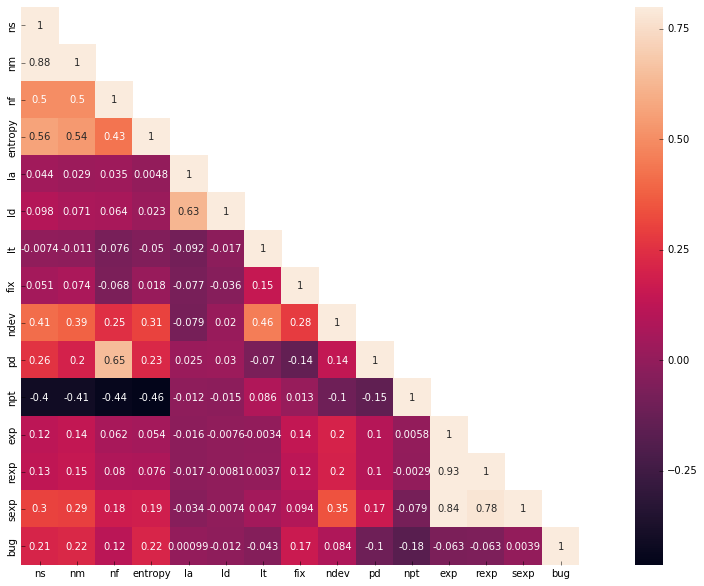

In [4]:
corrMatt = df.iloc[:, 1:].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

In [5]:
df.iloc[:, 0:16].head()

transactionid        commitdate  ns  nm  nf   entropy        la        ld  \
0              3  2001/12/12 17:41   1   1   3  0.579380  0.093620  0.000000   
1              7  1999/10/12 12:57   1   1   1  0.000000  0.000000  0.000000   
2              8   2002/5/15 16:55   3   3  52  0.739279  0.183477  0.208913   
3              9   2002/1/21 15:37   1   1   8  0.685328  0.016039  0.012880   
4             10  2001/12/19 16:44   2   2  38  0.769776  0.091829  0.072746   

           lt  fix  ndev     pd       npt  exp    rexp  sexp  
0  480.666667    1    14    596  0.666667  143  133.50   129  
1  398.000000    1     1      0  1.000000  140  140.00   137  
2  283.519231    0    23  15836  0.750000  984  818.65   978  
3  514.375000    1    21   1281  1.000000  579  479.25   550  
4  366.815789    1    21   6565  0.763158  413  313.25   405

In [6]:
import statsmodels.formula.api as smf

model = smf.OLS(df["bug"],df.iloc[:, 2:16])
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    bug   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     273.7
Date:                Fri, 25 Jan 2019   Prob (F-statistic):               0.00
Time:                        06:37:10   Log-Likelihood:                -2842.0
No. Observations:                4620   AIC:                             5712.
Df Residuals:                    4606   BIC:                             5802.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ns             0.0789      0.033      2.372      0.018       0.014       0.144
nm             0.0608      0.025      2.432      0.015       0.012       0.110
nf             0.0191      0.002      7.894      0.000       0.014       0.024
entropy        0.1612      0.023      7.062      0.000       0.116       0.206
la             0.0287      0.017      1.655      0.098      -0.005       0.063
ld            -0.0001   4.28e-05     -2.435      0.015      -0.000   -2.03e-05
lt         -4.502e-05   1.42e-05     -3.165      0.002   -7.29e-05   -1.71e-05
fix            0.2371      0.020     11.858      0.000       0.198       0.276
ndev          -0.0013      0.001     -1.538      0.124      -0.003       0.000
pd            -0.0002    1.4e-05    -13.028      0.000      -0.000      -0.000
npt            0.0306      0.024      1.253      0.210      -0.017       0.078
exp           -0.0001   5.38e-05     -2.193      0.028      -0.000   -1.25e-05
rexp          -0.0001   6.66e-05     -1.859      0.063      -0.000    6.73e-06
sexp           0.0002   4.99e-05      3.034      0.002    5.36e-05       0.000
==============================================================================
Omnibus:                     7673.718   Durbin-Watson:                   1.710
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              487.214
Skew:                           0.486   Prob(JB):                    1.60e-106
Kurtosis:                       1.740   Cond. No.                     6.02e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
# #exp, rexp, sexpの同士p値

# model1 = smf.OLS(df["exp"],df["rexp"])
# result = model.fit()
# result.summary()

In [8]:
# ~expとn~を削除
df["xexp"]  = ((df["exp"] + df["rexp"] + df["sexp"])/3)
df["nx"] = ((df["ns"] + df["nm"] )/2)
df = df.ix[:,[0,1,2,3,4,5,6,7,8,9,10, 11, 12, 13, 14, 15, 17, 18 ,16]]
df

/Users/hatorikoudai/.pyenv/versions/anaconda3-2.5.0/lib/python3.5/site-packages/ipykernel/__main__.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


transactionid        commitdate  ns  nm  nf   entropy         la  \
0                 3  2001/12/12 17:41   1   1   3  0.579380   0.093620   
1                 7  1999/10/12 12:57   1   1   1  0.000000   0.000000   
2                 8   2002/5/15 16:55   3   3  52  0.739279   0.183477   
3                 9   2002/1/21 15:37   1   1   8  0.685328   0.016039   
4                10  2001/12/19 16:44   2   2  38  0.769776   0.091829   
5                12   2002/1/21 15:42   1   1  16  0.760777   0.018308   
6                13   2001/12/27 2:25   2   2  33  0.816160   0.095682   
7                15   2001/12/27 0:28   2   2  33  0.816160   0.095682   
8                19     2002/2/8 9:40   2   2   9  0.650242   0.086558   
9                27    2003/4/25 1:41   2   2   8  0.795895   0.080952   
10               28  2002/12/10 19:41   2   2   3  0.873908   0.079208   
11               29  2002/11/27 11:00   2   2  10  0.761024   0.013782   
12               31    2002/8/26 2:16   4   4  63  0.995305   0.000062   
13               34    2002/2/26 1:13   2   2   3  0.770097   0.115809   
14               43   2002/1/30 17:58   2   2  41  0.800418   0.028489   
15               44   2001/12/2 23:05   3   3  21  0.800379   0.009292   
16               46    2002/8/8 20:08   2   2  12  0.614774   0.508086   
17               50    2002/2/4 11:57   3   3  22  0.815715   0.058697   
18               51   2002/1/21 17:58   2   2  38  0.914054   0.018813   
19               55   2002/5/23 15:33   1   1   1  0.000000   0.025641   
20               57     2003/9/2 2:54   2   2   2  1.000000   0.003236   
21               58    2003/4/27 3:20   2   2   7  0.803756   0.006195   
22               60    2003/2/23 2:31   2   2   4  0.825011   0.007243   
23               62   2003/1/23 19:27   2   2   3  0.946395   0.008721   
24               63    2003/1/23 2:11   2   2   2  1.000000   0.010381   
25               67   2002/11/28 5:49   2   2   9  0.552053   0.124817   
26               74    2002/8/19 9:59   2   2   7  0.662682   0.007537   
27               77    2002/7/3 19:07   2   2   7  0.780369   0.043266   
28               80   2002/1/19 20:44   2   2  38  0.907421   0.019177   
29               83  2001/10/23 11:44   2   2  10  0.725406   0.033937   
...             ...               ...  ..  ..  ..       ...        ...   
4590          19977   2004/2/12 17:32   2   2   3  0.652282   0.061475   
4591          19978    2004/2/4 10:23   1   1   1  0.000000   0.004444   
4592          20015   2002/9/28 17:44   1   1   2  0.997109   0.019376   
4593          20041   2004/10/25 3:13   2   2   2  1.000000   0.085106   
4594          20042    2004/7/30 6:34   1   1   1  0.000000   0.004405   
4595          20051   2005/8/30 20:47   1   1   1  0.000000   0.030888   
4596          20056   2006/9/29 16:05   1   1   1  0.000000   0.053241   
4597          20156  2006/10/14 16:34   3   3  12  0.851339   0.028654   
4598          20224    2004/7/22 1:14   1   1   2  0.985228   0.009749   
4599          20243   2002/7/26 14:16   1   1   3  0.920620   0.002151   
4600          20297     2003/1/6 2:53   1   1   1  0.000000   0.020000   
4601          20367  2005/12/20 17:02   1   1   1  0.000000   0.031022   
4602          20390    2004/4/15 1:44   1   1   1  0.000000   0.235294   
4603          20424   2004/1/21 19:02   2   2   2  0.970951   0.006678   
4604          20453   2004/9/14 19:30   1   1   1  0.000000   0.002183   
4605          20462   2003/6/25 19:23   2   2   4  0.344601   0.040169   
4606          20504   2002/4/26 19:18   1   1   1  0.000000   0.053097   
4607          20542    2004/7/5 21:12   1   1   3  0.547121   0.023891   
4608          20603   2003/9/14 19:00   1   1   1  0.000000   0.005587   
4609          20619   2004/8/29 17:29   2   2   7  0.831217   0.032576   
4610          20648  2005/12/13 16:16   1   1   1  0.000000   0.106845   
4611          20657  2004/12/13 21:29   1   1   1  0.000000   0.006289   
4612      

In [9]:
X = df.iloc[:, :-1]
dropFeatures = ["transactionid","la", "exp", "rexp", "sexp", "commitdate", "ndev", "npt", "ns", "nm"]
X.drop(dropFeatures, axis =1, inplace=True)
y = df.iloc[:, 18]

In [10]:
X.head()

nf   entropy        ld          lt  fix     pd        xexp   nx
0   3  0.579380  0.000000  480.666667    1    596  135.166667  1.0
1   1  0.000000  0.000000  398.000000    1      0  139.000000  1.0
2  52  0.739279  0.208913  283.519231    0  15836  926.883333  3.0
3   8  0.685328  0.012880  514.375000    1   1281  536.083333  1.0
4  38  0.769776  0.072746  366.815789    1   6565  377.083333  2.0

In [11]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3234, 8)
(1386, 8)
(3234,)
(1386,)


In [13]:
X_train.head()

nf   entropy        ld          lt  fix    pd        xexp   nx
3663   1  0.000000  0.004975  201.000000    0    60  435.000000  1.0
535    3  1.000000  0.003663  273.000000    1  1738  459.422222  2.0
509    1  0.000000  0.002577  388.000000    0     3  438.000000  1.0
66     6  0.859661  0.006858  267.333333    1   346   32.953175  3.0
188    1  0.000000  0.034674  721.000000    1    36   96.000000  1.0

In [14]:
#標準化

# from sklearn.preprocessing import StandardScaler
# scaler=StandardScaler()

# scaler.fit(X_train)
# X_train=scaler.transform(X_train)
# X_test=scaler.transform(X_test)

X_train = X_train.apply(lambda x: (x-x.mean())/x.std(), axis=0)
X_test = X_test.apply(lambda x: (x-x.mean())/x.std(), axis=0)


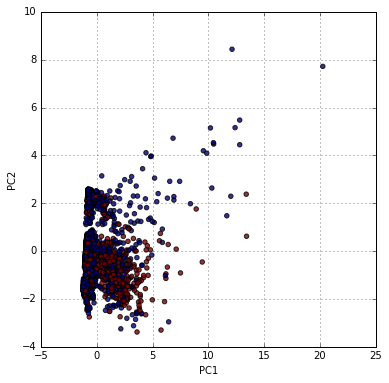

In [16]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

%matplotlib inline
#主成分分析の実行
pca = PCA()
feature = pca.fit(X_train)
# データを主成分空間に写像
feature = pca.transform(X_train)

# 主成分得点
pd.DataFrame(feature, columns=["PC{}".format(x + 1) for x in range(len(X_train.columns))]).head()

plt.figure(figsize=(6, 6))
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8, c=list(y_train))
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [17]:
pd.DataFrame(pca.explained_variance_ratio_, index=["PC{}".format(x + 1) for x in range(len(X_train.columns))])

0
PC1  0.301495
PC2  0.161083
PC3  0.125368
PC4  0.118009
PC5  0.114618
PC6  0.093970
PC7  0.052405
PC8  0.033052

In [18]:
pd.DataFrame(pca.explained_variance_, index=["PC{}".format(x + 1) for x in range(len(X_train.columns))])

0
PC1  2.411962
PC2  1.288663
PC3  1.002947
PC4  0.944070
PC5  0.916944
PC6  0.751762
PC7  0.419237
PC8  0.264416

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {'C' : [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters : {}".format(grid_search.best_params_))
print("Best cross-validation score : {:.3f}".format(grid_search.best_score_))

/Users/hatorikoudai/.pyenv/versions/anaconda3-2.5.0/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/hatorikoudai/.pyenv/versions/anaconda3-2.5.0/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/hatorikoudai/.pyenv/versions/anaconda3-2.5.0/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/hatorikoudai/.pyenv/versions/anaconda3-2.5.0/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/hatorikoudai/.pyenv/v

Best parameters : {'C': 10}
Best cross-validation score : 0.720


/Users/hatorikoudai/.pyenv/versions/anaconda3-2.5.0/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression(C=10)
lr.fit(X_train, y_train)
y_p_lr = lr.predict(X_test)
from sklearn.metrics import confusion_matrix
print("ロジスティック回帰の混合行列", confusion_matrix(y_test, y_p_lr))

print ("ロジスティック回帰での正答率", accuracy_score(y_test, y_p_lr))
#ロジスティック回帰正答率

ロジスティック回帰の混合行列 [[786  89]
 [325 186]]
ロジスティック回帰での正答率 0.7012987012987013


/Users/hatorikoudai/.pyenv/versions/anaconda3-2.5.0/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [21]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C' : [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters : {}".format(grid_search.best_params_))
print("Best cross-validation score : {:.3f}".format(grid_search.best_score_))

/Users/hatorikoudai/.pyenv/versions/anaconda3-2.5.0/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/hatorikoudai/.pyenv/versions/anaconda3-2.5.0/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/hatorikoudai/.pyenv/versions/anaconda3-2.5.0/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/hatorikoudai/.pyenv/versions/anaconda3-2.5.0/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/hatorikoudai/.pyenv/v

Best parameters : {'C': 10}
Best cross-validation score : 0.720


In [22]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=10)

svm.fit(X_train, y_train)
y_p_svm = svm.predict(X_test)
# 正答率を算出
print('SVMでの正答率', accuracy_score(y_test, y_p_svm))
print("SVMの混合行列", confusion_matrix(y_test, y_p_svm))

SVMでの正答率 0.6818181818181818
SVMの混合行列 [[763 112]
 [329 182]]


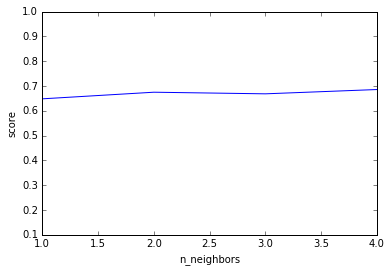

In [25]:
from sklearn.neighbors import KNeighborsClassifier

list_nn = []
list_score = []
for k in range(1, 5):
    knc = KNeighborsClassifier(n_neighbors=k)
    knc.fit(X_train, y_train)
    Y_pred = knc.predict(X_test)
    score = knc.score(X_test, y_test)
#     print("[%d] score: {:.2f}".format(score) % k)
    list_nn.append(k)
    list_score.append(score)

#プロット
plt.ylim(0.1, 1.0)
plt.xlabel("n_neighbors")
plt.ylabel("score")
plt.plot(list_nn, list_score)

In [26]:
knc = KNeighborsClassifier(n_neighbors=2)
knc.fit(X_train, y_train)
Y_pred = knc.predict(X_test)
score = knc.score(X_test, y_test)
print("knnの混合行列", confusion_matrix(y_test, Y_pred))
print ("knnでの正答率", accuracy_score(y_test, Y_pred))

knnの混合行列 [[772 103]
 [347 164]]
knnでの正答率 0.6753246753246753


In [27]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
from keras.layers.convolutional import Conv1D, UpSampling1D
from keras.layers.pooling import MaxPooling1D

Using TensorFlow backend.


In [28]:
# NN
import numpy as np
from sklearn import datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from keras.layers.core import Dense, Activation
from keras.utils import np_utils
from keras import backend as K
from keras.wrappers.scikit_learn import KerasClassifier


def bug_model(activation="relu", optimizer="adam", out_dim=100):
    dl_model = Sequential()
    dl_model.add(Dense(out_dim, input_dim=8, init='uniform', activation=activation))
    dl_model.add(Dense(out_dim, init='uniform', activation='relu'))
    dl_model.add(Dense(1, init='uniform', activation='sigmoid'))
    dl_model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return dl_model
    
activation = ["relu", "sigmoid"]
optimizer = ["adam", "adagrad"]
out_dim = [100, 200]
nb_epoch = [5, 10, 100]
batch_size = [5, 10, 100]
    



# dl_model.fit(X_train, y_train, nb_epoch=200, batch_size=10)
dl_model = KerasClassifier(build_fn=bug_model, verbose=0)
param_grid = dict(activation=activation, 
                  optimizer=optimizer, 
                  out_dim=out_dim, 
                  nb_epoch=nb_epoch, 
                  batch_size=batch_size)
grid = GridSearchCV(estimator=dl_model, param_grid=param_grid)

grid_result = grid.fit(X_train, y_train)


print (grid_result.best_score_)
print (grid_result.best_params_)



# scores = dl_model.evaluate(X_test, y_test)

# print("DLでの正答率",round(scores[1],2))

/Users/hatorikoudai/.pyenv/versions/anaconda3-2.5.0/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/hatorikoudai/.pyenv/versions/anaconda3-2.5.0/lib/python3.5/site-packages/ipykernel/__main__.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(100, input_dim=8, kernel_initializer="uniform", activation="relu")`
/Users/hatorikoudai/.pyenv/versions/anaconda3-2.5.0/lib/python3.5/site-packages/ipykernel/__main__.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(100, kernel_initializer="uniform", activation="relu")`
/Users/hatorikoudai/.pyenv/versions/anaconda3-2.5.0/lib/python3.5/site-packages/ipykernel/__main__.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform", activation="sigmo

0.7192331600148661
{'batch_size': 5, 'activation': 'relu', 'optimizer': 'adagrad', 'nb_epoch': 10, 'out_dim': 200}


/Users/hatorikoudai/.pyenv/versions/anaconda3-2.5.0/lib/python3.5/site-packages/ipykernel/__main__.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, kernel_initializer="uniform", activation="relu")`
/Users/hatorikoudai/.pyenv/versions/anaconda3-2.5.0/lib/python3.5/site-packages/ipykernel/__main__.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform", activation="sigmoid")`


In [ ]:
# CNN

from __future__ import print_function
 
from keras.models import Model
from keras.utils import np_utils
import numpy as np

import keras 
from keras.callbacks import ReduceLROnPlateau
      
def readucr(filename):
    data = np.loadtxt(filename, delimiter = ',')
    Y = data[:,0]
    X = data[:,1:]
    return X, Y
  
nb_epochs = 200
nb_classes = len(np.unique(y_test))
batch_size = min(X_train.shape[0]/10, 16)

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values


y_train = (y_train - y_train.min())/(y_train.max()-y_train.min())*(nb_classes-1)
y_test = (y_test - y_test.min())/(y_test.max()-y_test.min())*(nb_classes-1)

print(X_train.__class__.__name__)

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

X_train_mean = X_train.mean()
X_train_std = X_train.std()
X_train = (X_train - X_train_mean)/(X_train_std)

X_test = (X_test - X_train_mean)/(X_train_std)
X_train = X_train.reshape(X_train.shape + (1,1,))
X_test = X_test.reshape(X_test.shape + (1,1,))

x = keras.layers.Input(X_train.shape[1:])
#    drop_out = Dropout(0.2)(x)
conv1 = keras.layers.Conv2D(128, 8, 1, border_mode='same')(x)
conv1 = keras.layers.normalization.BatchNormalization()(conv1)
conv1 = keras.layers.Activation('relu')(conv1)

#    drop_out = Dropout(0.2)(conv1)
conv2 = keras.layers.Conv2D(256, 5, 1, border_mode='same')(conv1)
conv2 = keras.layers.normalization.BatchNormalization()(conv2)
conv2 = keras.layers.Activation('relu')(conv2)

#    drop_out = Dropout(0.2)(conv2)
conv3 = keras.layers.Conv2D(128, 3, 1, border_mode='same')(conv2)
conv3 = keras.layers.normalization.BatchNormalization()(conv3)
conv3 = keras.layers.Activation('relu')(conv3)

full = keras.layers.pooling.GlobalAveragePooling2D()(conv3)    
out = keras.layers.Dense(nb_classes, activation='softmax')(full)


model = Model(input=x, output=out)

optimizer = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor = 'loss', factor=0.5,
                  patience=50, min_lr=0.0001) 
hist = model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epochs,
          verbose=1, validation_data=(X_test, Y_test), callbacks = [reduce_lr])
#Print the testing results which has the lowest training loss.
log = pd.DataFrame(hist.history)
print(log.loc[log['loss'].idxmin]['loss'], log.loc[log['loss'].idxmin]['val_acc'])


In [ ]:
#RNN

import numpy as np

from sklearn import datasets
from sklearn.model_selection import train_test_split

from keras.layers.core import Dense, Activation
from keras.utils import np_utils
from sklearn import preprocessing

def build_multilayer_perceptron():
#     """多層パーセプトロンモデルを構築"""
    rnn_model = Sequential()
    rnn_model.add(Dense(16, input_shape=(13, )))
    rnn_model.add(Activation('relu'))
    rnn_model.add(Dense(2))
    rnn_model.add(Activation('softmax'))
    return rnn_model


# モデル構築
rnn_model = build_multilayer_perceptron()
rnn_model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

# モデル訓練
start = time.time()
rnn_model.fit(X_train, y_train, nb_epoch=200, batch_size=3, verbose=1)
elapsed_time = time.time() - start
print ("elapsed_time:{0}".format(elapsed_time) + "[sec]")

# モデル評価
loss, accuracy = rnn_model.evaluate(X_test, y_test, verbose=0)
# print("Accuracy = {:.3f}".format(accuracy))

print ("RNNでの正答率", round(accuracy,2))